In [1]:
# This is for part3

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from collections import defaultdict
from tqdm import tqdm

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import MultiLabelBinarizer


# Function to encode a chunk of transactions
def encode_transactions(transactions, te):
    te_ary = te.transform(transactions)
    return pd.DataFrame(te_ary, columns=te.columns_)

# Initialize TransactionEncoder
te = TransactionEncoder()

# Parameters
chunk_size = 60000  # Adjust chunk size to your system's memory limit
min_support = 0.05  # Adjust the minimum support value as needed
total_transactions = 0  # Keep track of total number of transactions
all_items_set = set()  # This will hold all unique items
selected_columns = ['salesperson_name', 'property_type', 'transaction_type', "represented"]  # Example columns from your dataset

# First pass: create the set of all unique items
for chunk in tqdm(pd.read_csv("CEASalespersonsPropertyTransactionRecordsresidential.csv", chunksize=chunk_size, usecols=selected_columns)):
    # Convert columns to string to create unique items
    chunk = chunk.astype(str)
    transactions = chunk[selected_columns].values.tolist()
    all_items_set.update([item for sublist in transactions for item in sublist])

# Fit the TransactionEncoder to all items
te.fit([list(all_items_set)])

# Initialize dictionary to keep track of itemset support across all chunks
itemset_support_dict = defaultdict(int)

# Second pass: read the CSV file in chunks and process each chunk
for chunk in tqdm(pd.read_csv("CEASalespersonsPropertyTransactionRecordsresidential.csv", chunksize=chunk_size, usecols=selected_columns)):
    # Convert columns to string to create unique items
    chunk = chunk.astype(str)
    transactions = chunk[selected_columns].values.tolist()
    df_encoded = encode_transactions(transactions, te)
    chunk_frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)
    for index, row in chunk_frequent_itemsets.iterrows():
        itemset = frozenset(row['itemsets'])
        support = row['support']
        itemset_support_dict[itemset] += support * len(chunk)
    total_transactions += len(chunk)

# Convert support counts to relative support values
for itemset in itemset_support_dict.keys():
    itemset_support_dict[itemset] /= total_transactions

# Filter itemsets by global support to get the final frequent itemsets
global_frequent_itemsets = {itemset for itemset, support in itemset_support_dict.items() if support >= min_support}

# Display the global frequent itemsets
print(global_frequent_itemsets)

14it [00:01,  9.24it/s]
14it [00:32,  2.30s/it]

{frozenset({'RESALE', 'BUYER'}), frozenset({'WHOLE RENTAL', 'LANDLORD'}), frozenset({'CONDOMINIUM_APARTMENTS', 'TENANT', 'WHOLE RENTAL'}), frozenset({'TENANT', 'WHOLE RENTAL'}), frozenset({'WHOLE RENTAL', 'CONDOMINIUM_APARTMENTS', 'LANDLORD'}), frozenset({'SELLER'}), frozenset({'ROOM RENTAL'}), frozenset({'WHOLE RENTAL', 'HDB', 'LANDLORD'}), frozenset({'RESALE', 'HDB'}), frozenset({'RESALE', 'HDB', 'BUYER'}), frozenset({'CONDOMINIUM_APARTMENTS', 'SELLER'}), frozenset({'RESALE', 'HDB', 'SELLER'}), frozenset({'HDB', 'WHOLE RENTAL'}), frozenset({'CONDOMINIUM_APARTMENTS', 'LANDLORD'}), frozenset({'CONDOMINIUM_APARTMENTS', 'TENANT'}), frozenset({'RESALE', 'SELLER'}), frozenset({'HDB'}), frozenset({'CONDOMINIUM_APARTMENTS', 'RESALE'}), frozenset({'ROOM RENTAL', 'LANDLORD'}), frozenset({'BUYER'}), frozenset({'WHOLE RENTAL'}), frozenset({'CONDOMINIUM_APARTMENTS', 'WHOLE RENTAL'}), frozenset({'HDB', 'LANDLORD'}), frozenset({'CONDOMINIUM_APARTMENTS'}), frozenset({'LANDLORD'}), frozenset({'RESALE

In [2]:
# This is for part3

import numpy as np

df = pd.read_csv("CEASalespersonsPropertyTransactionRecordsresidential.csv")

# Define the columns that you consider as items for the Apriori algorithm
selected_columns = ['salesperson_name', 'property_type', 'transaction_type', "represented"]

# Create transactions: Each transaction is a list of items
all_transactions = df.apply(lambda x: x.tolist(), axis=1).tolist()


unique_items = {item for itemset in global_frequent_itemsets for item in itemset}

# Initialize MultiLabelBinarizer with the unique items obtained from global_frequent_itemsets
mlb = MultiLabelBinarizer(classes=sorted(unique_items))

# Prepare the binary matrix for the given transactions
binary_matrix = mlb.fit_transform(all_transactions)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:900: UserWarning: unknown class(es) ["'AFFAN BIN ASHAK HARI", '-', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', 'AARON BAN QI WEI', 'AARON CHENG JIN RONG', 'AARON GOH JIN HAO', 'AARON HUAN SHEN LI', 'AARON LEONG JIA SHENG', 'AARON OON WEI YAN', 'AARON POH YONG CHUAN', 'AARON QUEK TZE SENG', 'AARON TEO ZONG JIE', 'AARON YEO RONG XIAN', 'AARON YEO YI', 'AB HALIM B MOHAMED HUZIR', 'ABBY PEH AI HUI', 'ABBY POH SHI YING', 'ABD WAHAB BIN MAIDIN', 'ABDUL AZIZ B ABDUL RAHMAN', 'ABDUL AZIZ BIN ABDUL SALAM', 'ABDUL AZIZ BIN IBRAHIM', 'ABDUL AZIZ BIN MOHAMED ALI', 'ABDUL AZIZ S/O SHAHUL HAMEED', 'ABDUL GHAFUR KHAN BIN AB AZIS KHAN', 'ABDUL GHANI BIN ANUAR', 'ABDUL HALIM BIN ABDUL HAMID', 'ABDUL HALIM BIN ABDUL RAHMAN', 'ABDUL HALIM BIN YUNOS', 'ABDUL HAMID BIN A RAZAK', 'ABDUL JABBAR BIN ABDUL RAHMAN',

### Can tune PCA input, If we can be used for part 4 ?

In [20]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming binary_matrix is your binary matrix from previous steps
# Apply PCA to reduce the dimensionality for visualization purposes
# can tune PCA input, can be used for part 4

pca = PCA(2)
reduced_data_2 = pca.fit_transform(binary_matrix)

pca = PCA(3)
reduced_data_3 = pca.fit_transform(binary_matrix)

pca = PCA(4)
reduced_data_4 = pca.fit_transform(binary_matrix)



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


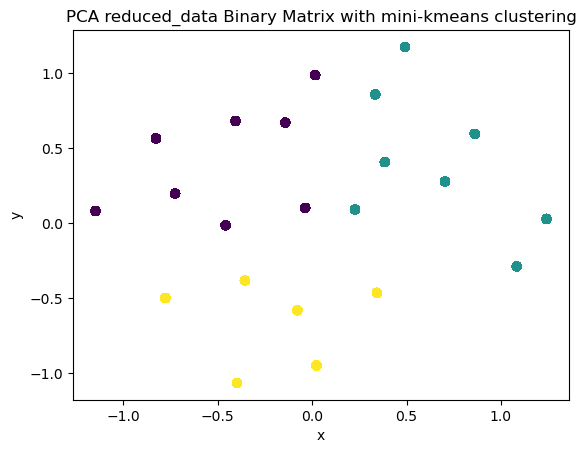

In [21]:
# Now, use the binary_matrix for mini-kmeans clustering
from sklearn.cluster import MiniBatchKMeans
mini_kmeans = MiniBatchKMeans(n_clusters=3, random_state=0, batch_size=1000)
mini_kmeans_labels = mini_kmeans.fit_predict(reduced_data_2)

plt.scatter(reduced_data_2[:, 0], reduced_data_2[:, 1], c=mini_kmeans_labels, cmap='viridis', marker='o')
plt.title('PCA reduced_data Binary Matrix with mini-kmeans clustering')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

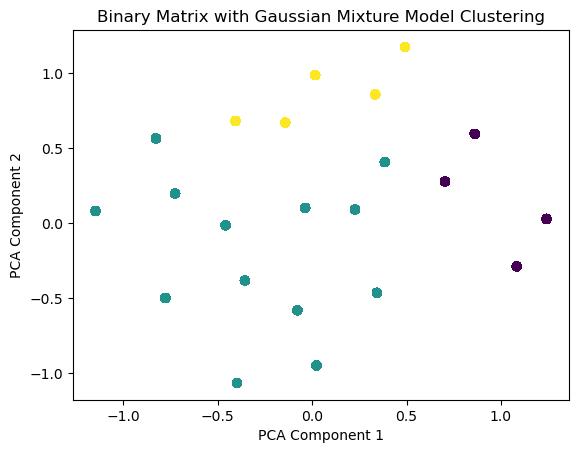

In [22]:
from sklearn.mixture import GaussianMixture

# Apply Gaussian Mixture Model to the binary matrix
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_labels = gmm.fit_predict(reduced_data_2)

# Plot the PCA-reduced data with GMM cluster labels
plt.scatter(reduced_data_2[:, 0], reduced_data_2[:, 1], c=gmm_labels, cmap='viridis', marker='o')
plt.title('Binary Matrix with Gaussian Mixture Model Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

## This can be use for Our part 4 for tuning

In [23]:
# this can be use for Out part 4
# loop over a range of n_components and covariance types to find the best model

for covariance_type in ['spherical', 'diag', 'tied', 'full']:
    for k in range(1, 7):  # example range from 1 to 6 clusters
        gmm = GaussianMixture(n_components=k, covariance_type=covariance_type, random_state=0)
        gmm.fit(reduced_data)
        print(f"Covariance type: {covariance_type}, K: {k}, AIC: {gmm.aic(reduced_data)}, BIC: {gmm.bic(reduced_data)}, ratio: ",gmm.bic(reduced_data)/gmm.aic(reduced_data))


Covariance type: spherical, K: 1, AIC: 3720219.6999141835, BIC: 3720254.4764826563, ratio:  1.0000093479878283
Covariance type: spherical, K: 2, AIC: 2432652.5760263503, BIC: 2432733.7213527868, ratio:  1.000033356726413
Covariance type: spherical, K: 3, AIC: 2139180.633107403, BIC: 2139308.1471918025, ratio:  1.0000596088438845
Covariance type: spherical, K: 4, AIC: 1357699.5616842024, BIC: 1357873.4445265657, ratio:  1.000128071664211
Covariance type: spherical, K: 5, AIC: 835281.8573793126, BIC: 835502.1089796396, ratio:  1.0002636853636664
Covariance type: spherical, K: 6, AIC: -3128902.507505225, BIC: -3128635.8871469344, ratio:  0.9999147878984241
Covariance type: diag, K: 1, AIC: 3532684.5922914683, BIC: 3532730.961049432, ratio:  1.0000131256433322
Covariance type: diag, K: 2, AIC: 2313543.160736718, BIC: 2313647.4904421363, ratio:  1.0000450952059978
Covariance type: diag, K: 3, AIC: 1996005.0110792748, BIC: 1996167.3017321473, ratio:  1.000081307738193
Covariance type: diag, 